<a href="https://colab.research.google.com/github/msuman-07/ML-Projects/blob/main/Clustering_Plant_Iris_Using_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

In [22]:
from google.colab import files
uploaded = files.upload()

Saving iris_dataset.csv to iris_dataset (2).csv


In [23]:
dataset = pd.read_csv('iris_dataset.csv')

# Encode species to numeric labels

In [24]:
label_encoder = LabelEncoder()
dataset['species_encoded'] = label_encoder.fit_transform(dataset['species'])

# Separate features and target

In [25]:
X = dataset.iloc[:, 0:4].values  # First 4 columns: features
y = dataset['species_encoded'].values
target_names = label_encoder.classes_

# Apply PCA to reduce to 2 components

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.92461872 0.05306648]


# Apply Agglomerative Clustering

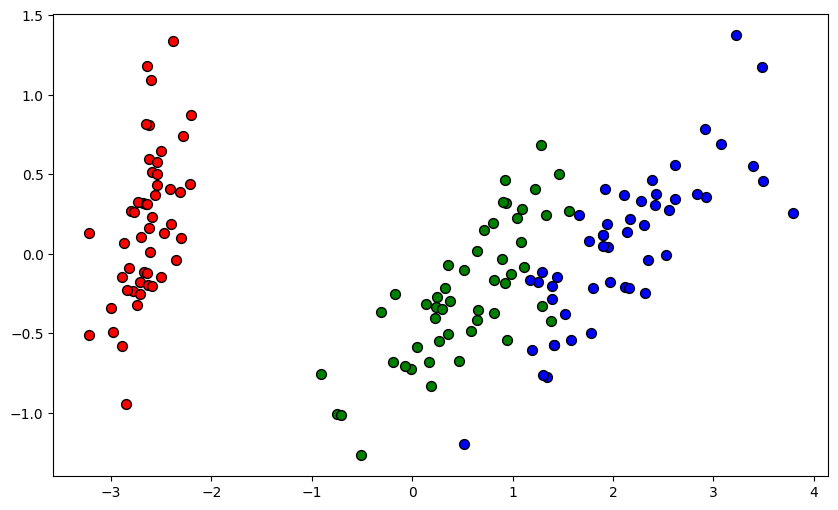

In [27]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_means = model.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

# Plot true labels
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=target_name, s=50, edgecolor='k')

# Plot clustering result as background

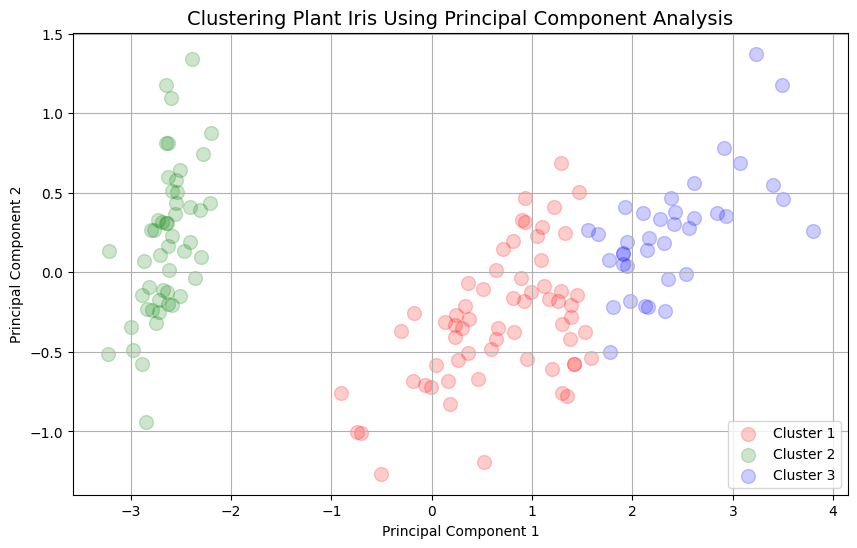

In [28]:
plt.figure(figsize=(10, 6))

plt.scatter(X_pca[y_means == 0, 0], X_pca[y_means == 0, 1], s=100, c='red', alpha=0.2, label='Cluster 1')
plt.scatter(X_pca[y_means == 1, 0], X_pca[y_means == 1, 1], s=100, c='green', alpha=0.2, label='Cluster 2')
plt.scatter(X_pca[y_means == 2, 0], X_pca[y_means == 2, 1], s=100, c='blue', alpha=0.2, label='Cluster 3')

plt.title('Clustering Plant Iris Using Principal Component Analysis', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()